# Part I - Analyzing FordGoBike Data
## by Khaled Zoheir

## Introduction [Wikipedia](https://en.wikipedia.org/wiki/Bay_Wheels)
> Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.Bay Wheels is 'the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

> In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from glob import glob

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# Note: After starting, found out only Feb is there!
# Looked at knowledge base: https://knowledge.udacity.com/questions/668930
# Downloaded other months from: https://s3.amazonaws.com/baywheels-data/index.html
#df_bike_trips = pd.read_csv('201902-fordgobike-tripdata.csv')
#df_bike_trips.head()

In [3]:
all_months = glob('*.csv')
print(len(all_months), all_months)

12 ['201901-fordgobike-tripdata.csv', '201902-fordgobike-tripdata.csv', '201903-fordgobike-tripdata.csv', '201904-fordgobike-tripdata.csv', '201905-baywheels-tripdata.csv', '201906-baywheels-tripdata.csv', '201907-baywheels-tripdata.csv', '201908-baywheels-tripdata.csv', '201909-baywheels-tripdata.csv', '201910-baywheels-tripdata.csv', '201911-baywheels-tripdata.csv', '201912-baywheels-tripdata.csv']


In [4]:
list_data_frame = [pd.read_csv(month, low_memory=False) for month in all_months]

In [5]:
print(type(list_data_frame))

<class 'list'>


In [6]:
df_bike_trips = pd.concat(list_data_frame, ignore_index=True)

In [7]:
#pd.set_option('display.max_rows', 500)

In [8]:
# Basic df info
df_bike_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [9]:
'''Note: The data for the 12 months that I am using do not contain: member_birth_year nor the member_gender as the one provided by Udacity'''

'Note: The data for the 12 months that I am using do not contain: member_birth_year nor the member_gender as the one provided by Udacity'

In [10]:
df_bike_trips.user_type.value_counts()

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

In [11]:
df_bike_trips.bike_share_for_all_trip.value_counts()

No     2086152
Yes     177572
Name: bike_share_for_all_trip, dtype: int64

In [12]:
df_bike_trips.rental_access_method.value_counts()

app        108010
clipper     12828
Name: rental_access_method, dtype: int64

### What is the structure of your dataset?

* Iit contains 2506983 trips and 15 columns/features:
* It contains info about: The trip, trip time, user, bike:
* * The trip: `start_station_id`, `start_station_name`, `start_station_latitude`, `start_station_longitude`, `end_station_id`, `end_station_name`, `end_station_latitude`, `end_station_longitude`
* * Trip time:`start_time`, `end_time` and `duration_sec` (redundent - may need to check for consistency)
* * User: `user_type`, `rental_access_method`, `bike_share_for_all_trip`
* * Bike: `bike_id`

We can derive some more info from above: 
* * `day_of_the_year`: This could be useful to see if there are certain days of importance. (taken from: `start_time`)
* * `hour_of_day`
* * `day_of_week`
* * `month`
* * `duration_min`
* * `ground_distance`: While it's not easy to get the actual biking distane, we can still get a distance that we can compare: The ground distance between: Start and end stations using: `start_station_latitude`, `start_station_longitude`, `end_station_latitude` and `end_station_longitude`: Ref: (https://www.geeksforgeeks.org/program-distance-two-points-earth/)

### What is/are the main feature(s) of interest in your dataset?

* Most of the features are of interest. May be less interested in: `bike_share_for_all_trip`
* I am mainly interested in finding which time (day of the week, etc) Is the most time of using the service and which is the low time. This is useful to provide a better servie
* I am also interested in finding the usual distance travelled. Shortest and longest.
* Finally, do riders always go from a specific station to another or is it totally random. This is very useful as we may need to transport the bikes to the start stations.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Almost all except: `bike_share_for_all_trip` and stations names

## Data Cleaning

In [13]:
df_bike_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [14]:
print(df_bike_trips.shape)
df_bike_trips.isnull().sum()

(2506983, 15)


duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

In [15]:
'''Some fileds are missing station information: start_station_id, start_station_name, end_station_id or end_station_name. We can delete those records'''

'Some fileds are missing station information: start_station_id, start_station_name, end_station_id or end_station_name. We can delete those records'

In [16]:
df_bike_trips[(df_bike_trips['start_station_id'].isnull() | df_bike_trips['start_station_name'].isnull() | df_bike_trips['end_station_id'].isnull() | df_bike_trips['end_station_name'].isnull())]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
2023,746,2019-01-31 18:21:27.0020,2019-01-31 18:33:53.0870,NaN,NaN,37.400000,-121.920000,NaN,NaN,37.410000,-121.940000,4244,Subscriber,No,NaN
2533,278,2019-01-31 18:00:28.2040,2019-01-31 18:05:07.0900,NaN,NaN,37.400000,-121.940000,NaN,NaN,37.400000,-121.940000,4249,Subscriber,Yes,NaN
3089,830,2019-01-31 17:23:59.3410,2019-01-31 17:37:50.0250,NaN,NaN,37.390000,-121.930000,NaN,NaN,37.400000,-121.930000,4208,Subscriber,No,NaN
5264,562,2019-01-31 13:29:18.5250,2019-01-31 13:38:41.0210,NaN,NaN,37.400000,-121.930000,NaN,NaN,37.390000,-121.930000,4208,Subscriber,No,NaN
5833,1676,2019-01-31 11:36:57.0450,2019-01-31 12:04:53.5010,NaN,NaN,37.400000,-121.940000,NaN,NaN,37.400000,-121.940000,4251,Customer,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506978,731,2019-12-28 18:37:29,2019-12-28 18:49:40,NaN,NaN,37.809731,-122.409855,NaN,NaN,37.807573,-122.421681,719651,Subscriber,NaN,app
2506979,748,2019-12-28 18:37:24,2019-12-28 18:49:53,NaN,NaN,37.809768,-122.409797,NaN,NaN,37.807558,-122.421638,655411,Subscriber,NaN,app
2506980,1044,2019-12-26 14:25:37,2019-12-26 14:43:02,NaN,NaN,37.810183,-122.410271,NaN,NaN,37.807225,-122.408850,936881,Subscriber,NaN,app
2506981,326,2019-12-30 20:35:43,2019-12-30 20:41:09,NaN,NaN,37.810471,-122.417386,NaN,NaN,37.803143,-122.414373,397539,Subscriber,NaN,app


In [17]:
df_bike_trips.dropna(subset=['start_station_id' , 'start_station_name', 'end_station_id', 'end_station_name'], inplace=True)

In [18]:
# We should no longer have nulls for stations
df_bike_trips.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id                 0
start_station_name               0
start_station_latitude           0
start_station_longitude          0
end_station_id                   0
end_station_name                 0
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     144280
rental_access_method       2385400
dtype: int64

In [19]:
'''For null member birth year, this is Ok. We will skip them if needed in an analysis'''

'For null member birth year, this is Ok. We will skip them if needed in an analysis'

#### Some data types issues:

1- time fileds: start_time and end_time: should be datetime type

2- Id fields: start_station_id, end_station_id and bike_id: Should be non-numeric. We will do any mathematical operations on them. They should be string

3- Category fields: user_type and rental_access_method

4- bike_share_for_all_trip: Should be boolean. We wil leave it as it contains null and it will not be used in the analysis

In [20]:
df_bike_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407259 entries, 0 to 2506660
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 293.9+ MB


In [21]:
df_bike_trips['start_time'] = pd.to_datetime(df_bike_trips['start_time'])
df_bike_trips['end_time'] = pd.to_datetime(df_bike_trips['end_time'])

df_bike_trips['start_station_id'] = df_bike_trips['start_station_id'].astype('str')
df_bike_trips['end_station_id'] = df_bike_trips['end_station_id'].astype('str')
df_bike_trips['bike_id'] = df_bike_trips['bike_id'].astype('str')

df_bike_trips['user_type'] = df_bike_trips['user_type'].astype('category')
df_bike_trips['rental_access_method'] = df_bike_trips['rental_access_method'].astype('category')


In [22]:
df_bike_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407259 entries, 0 to 2506660
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  object        
 14  rental_access_method     category      
dtypes: category(2), datetime64[ns](2), float64(4), int64(1), object(6)
memory usage: 261.7+ MB


In [23]:
df_bike_trips.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id                 0
start_station_name               0
start_station_latitude           0
start_station_longitude          0
end_station_id                   0
end_station_name                 0
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     144280
rental_access_method       2385400
dtype: int64

In [24]:
'''Let's see if there are duplicates'''
df_bike_trips.duplicated().sum()

0

In [25]:
'''No duplicates - nothing to clean'''

'No duplicates - nothing to clean'

In [26]:
''''Now let's add some new fields'''

"'Now let's add some new fields"

In [27]:
#* * `day_of_the_year`: This could be useful to see if there are certain days of importance. (taken from: `start_time`)
#* * `hour_of_day`
#* * `day_of_week`
#* * `working_day`, A boolean indicating of it's a working day (True) or a weekend (False)
#* * `month`
#* * `member_age`
#* * `ground_distance`: While it's not easy to get the actual biking distane, we can still get a distance that we can compare: The ground distance between: Start and end stations using: `start_station_latitude`, `start_station_longitude`, `end_station_latitude` and `end_station_longitude`: Ref: (https://www.geeksforgeeks.org/program-distance-two-points-earth/)
df_bike_trips['day_of_the_year'] = df_bike_trips['start_time'].dt.dayofyear
df_bike_trips['hour_of_day'] = df_bike_trips['start_time'].dt.hour
df_bike_trips['day_of_week'] = df_bike_trips['start_time'].dt.dayofweek
df_bike_trips['working_day'] = np.where(df_bike_trips['start_time'].dt.dayofweek < 5, True, False)
df_bike_trips['month'] = df_bike_trips['start_time'].dt.month
df_bike_trips['duration_min'] = df_bike_trips['duration_sec']/60


In [28]:
df_bike_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407259 entries, 0 to 2506660
Data columns (total 21 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  object        
 14  rental_access_method     category      
 15  day_of_the_year          int64         
 16  hour_of_day              int64         
 17  day_of_week              in

In [29]:
# Ground Distance
from math import radians, cos, sin, asin, sqrt
def g_distance(lat1, lat2, lon1, lon2):
    # The math module contains a function named
    # radians which converts from degrees to radians.

    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r)
df_bike_trips['ground_distance'] = df_bike_trips.apply(lambda x: g_distance(x["start_station_latitude"], x["end_station_latitude"], x["start_station_longitude"], x["end_station_longitude"]), axis=1)

In [30]:
# Correct types
df_bike_trips['day_of_the_year'] = df_bike_trips['day_of_the_year'].astype('category')
#df_bike_trips['hour_of_day'] = df_bike_trips['hour_of_day'].astype('category') # This is better to be left as numeric
df_bike_trips['day_of_week'] = df_bike_trips['day_of_week'].astype('category')
df_bike_trips['working_day'] = df_bike_trips['working_day'].astype('bool')
df_bike_trips['month'] = df_bike_trips['month'].astype('category')

In [31]:
df_bike_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407259 entries, 0 to 2506660
Data columns (total 22 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  object        
 14  rental_access_method     category      
 15  day_of_the_year          category      
 16  hour_of_day              int64         
 17  day_of_week              ca

In [32]:
'''Drop not unused column'''
#df_bike_trips.drop(['bike_share_for_all_trip'], inplace =True, axis=1)
df_bike_trips.drop(['duration_sec'], inplace =True, axis=1)

In [33]:
df_bike_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407259 entries, 0 to 2506660
Data columns (total 21 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   start_time               datetime64[ns]
 1   end_time                 datetime64[ns]
 2   start_station_id         object        
 3   start_station_name       object        
 4   start_station_latitude   float64       
 5   start_station_longitude  float64       
 6   end_station_id           object        
 7   end_station_name         object        
 8   end_station_latitude     float64       
 9   end_station_longitude    float64       
 10  bike_id                  object        
 11  user_type                category      
 12  bike_share_for_all_trip  object        
 13  rental_access_method     category      
 14  day_of_the_year          category      
 15  hour_of_day              int64         
 16  day_of_week              category      
 17  working_day              bo

## Univariate Exploration

In [34]:
'''In the following cells I will be displaying a bar graph for different features. Let's have a function that does this for us'''

"In the following cells I will be displaying a bar graph for different features. Let's have a function that does this for us"

In [35]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
week_day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
global_sample = False # If True it will display a sample of the data for program syntax testing. If False will work with the whole dataframe
def bar_graph_single_feature (df, feature, suptitle, x_label, xticks = "", color_palette =4, sample=False):
    base_color = sb.color_palette()[color_palette]
    graph = sb.catplot(data = (df if sample == False else df.sample(n=100)), x = feature, kind = 'count', aspect = 1.7, color = base_color);

    graph.set_axis_labels(x_label, 'Number of Bike Trips'),

    graph.fig.suptitle(suptitle, y = 1.05, fontsize = 16, fontweight = 'bold')

    if (xticks!= ''):
        graph.set_xticklabels(xticks, rotation=75)

   #### Let's see the distribution over the months

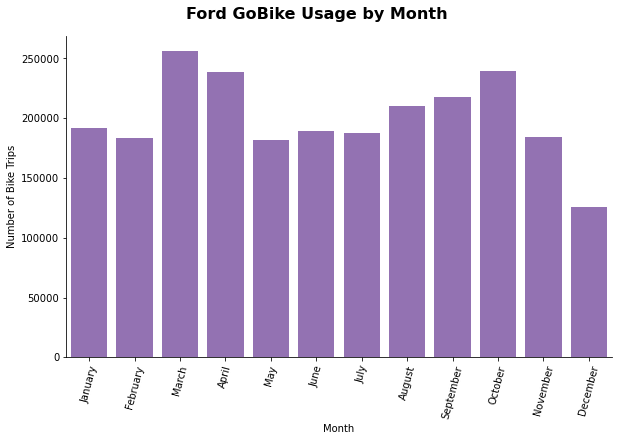

In [36]:
# Monthly usage of the Ford Go Bike system
bar_graph_single_feature (df_bike_trips, 'month', 'Ford GoBike Usage by Month', 'Month', months, sample=global_sample)

Surprisingly! The summer is not the highest utilization. May be it's too hot for biking.
The highst months are spring and autumn months. Not too cold and not too hot apparently

   #### Let's see the distribution over the weekdays

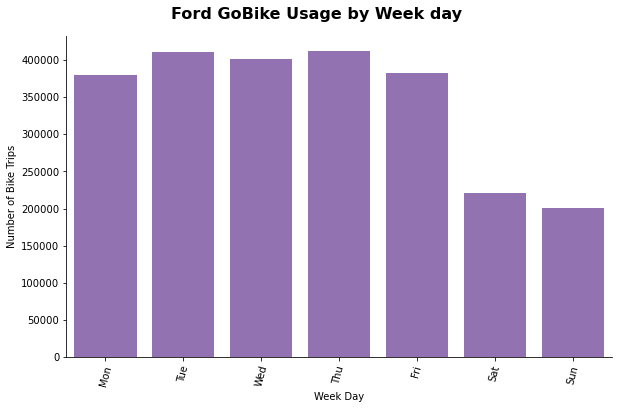

In [37]:
# Weekdays usage of the Ford Go Bike system
bar_graph_single_feature (df_bike_trips, feature='day_of_week', suptitle='Ford GoBike Usage by Week day', x_label='Week Day', xticks=week_day, sample=global_sample)

As expected, the working days: Mon-Fri shows higer utilization than weekends. This implies that riders are mainly using the bikes as part of their daily routine rather than for leasure.

#### Now what about the distribution over hours in workdays?

#### From the above curve. We can split the analysis to Week days Vs. Weekend. I.e.: We can select a subset of data and work on it

#### What about the hours distribution on weekdays?

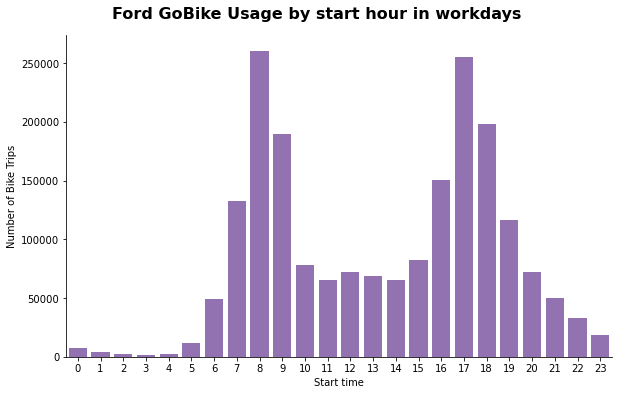

In [38]:
# Hourly distribution in workdays
bar_graph_single_feature (df_bike_trips[df_bike_trips.working_day == True], feature='hour_of_day', suptitle='Ford GoBike Usage by start hour in workdays', x_label='Start time', xticks='', sample=False)

#### As expected, two peaks: 7:00 - 9:00 am and 4:00 - 7:00 pm.  We can easily conclude that many are using it to go to work.
#### To confirm, let's put the weekends as well to see if this conclusion changes dramatically

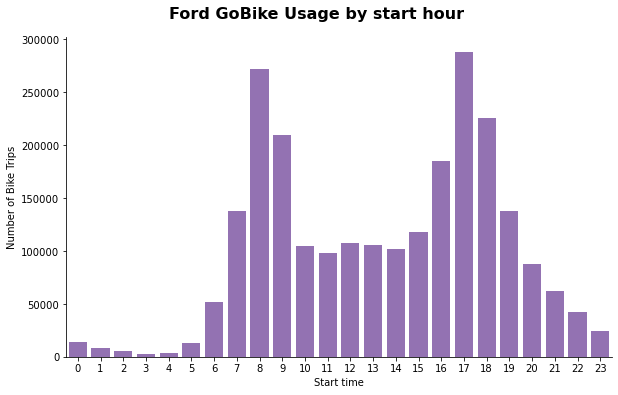

In [39]:
bar_graph_single_feature (df_bike_trips, feature='hour_of_day', suptitle='Ford GoBike Usage by start hour', x_label='Start time', xticks='', sample=False)

#### More or less it confirrms the finding. Most rides are to go and some back from work. If we include weekends, then we can see a slight decrease of 7:00 am as ppl have tendency to start later.

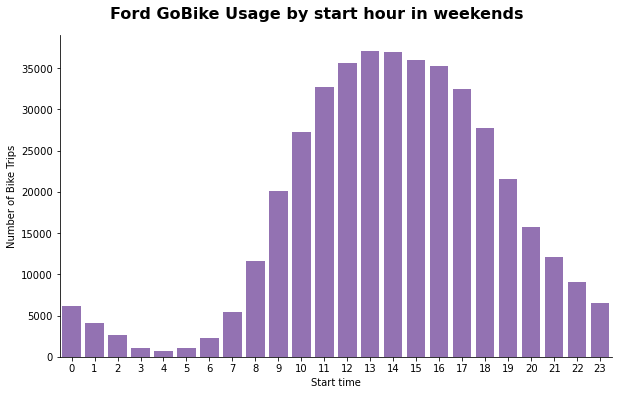

In [40]:
'''Extra cuver for weekends'''
bar_graph_single_feature (df_bike_trips[df_bike_trips.working_day == False], feature='hour_of_day', suptitle='Ford GoBike Usage by start hour in weekends', x_label='Start time', xticks='', sample=False)

### From above, we can guess that subscribers are our major customers. Let's check this:

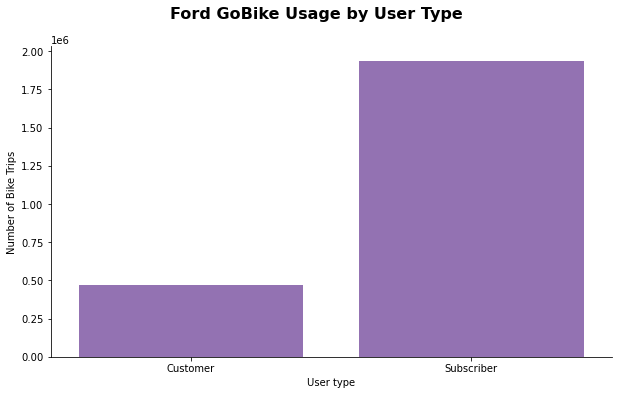

In [41]:
bar_graph_single_feature (df_bike_trips, feature='user_type', suptitle='Ford GoBike Usage by User Type', x_label='User type', xticks='', sample=False)

In [42]:
'''Yes most of our users are Subscribers. Let's see the same on a pie chart'''

"Yes most of our users are Subscribers. Let's see the same on a pie chart"

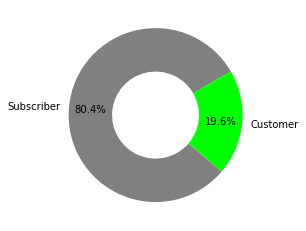

In [43]:
plt.pie(df_bike_trips['user_type'].value_counts(),
        autopct = '%1.1f%%',
        startangle = 30,
        labels = df_bike_trips['user_type'].value_counts().index,
        pctdistance = 0.75,
        wedgeprops = {'width' : 0.5},
       colors=
           ['gray', 'lime']);

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Let's move to the rides. How long does it take?

In [44]:
df_bike_trips.duration_min.describe()

count    2.407259e+06
mean     1.341362e+01
std      3.184531e+01
min      1.000000e+00
25%      5.966667e+00
50%      9.483333e+00
75%      1.471667e+01
max      1.437167e+03
Name: duration_min, dtype: float64

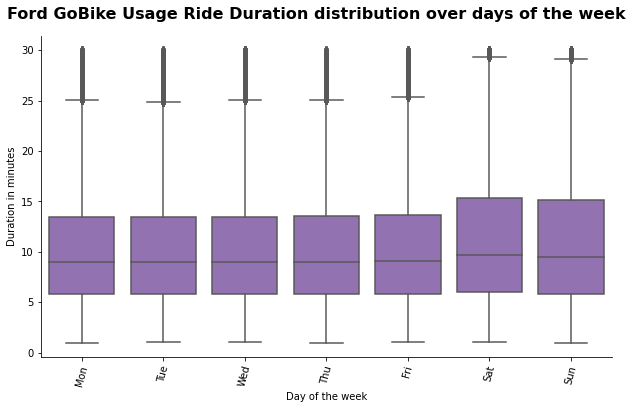

In [45]:
base_color = sb.color_palette()[4]
graph = sb.catplot(data = df_bike_trips.query('duration_min < 30'),  x = 'day_of_week', y = 'duration_min',kind = 'box', aspect = 1.7, color = base_color);
graph.set_axis_labels('Day of the week', 'Duration in minutes'),
graph.fig.suptitle('Ford GoBike Usage Ride Duration distribution over days of the week', y = 1.05, fontsize = 16, fontweight = 'bold');
graph.set_xticklabels(week_day, rotation=75);

In [46]:
'''Most rides lasts for 10 - 15 minutes'''

'Most rides lasts for 10 - 15 minutes'

#### What about the distance travelled. Of course we cannot have accurate distance from the table. Instead we will use the ground distance.

In [47]:
df_bike_trips.ground_distance.describe()

count    2.407259e+06
mean     2.062120e+00
std      6.849460e+01
min      0.000000e+00
25%      9.317785e-01
50%      1.453611e+00
75%      2.229878e+00
max      1.279973e+04
Name: ground_distance, dtype: float64

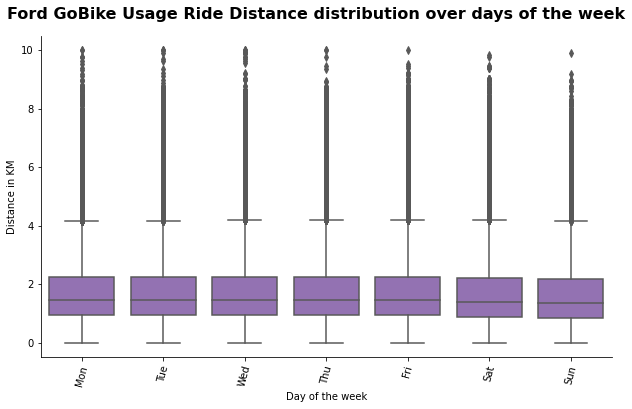

In [48]:
'''There seems to be some outliers - Let's get rid of them '''
graph = sb.catplot(data = df_bike_trips.query('ground_distance < 10'),  x = 'day_of_week', y = 'ground_distance',kind = 'box', aspect = 1.7, color = base_color);
graph.set_axis_labels('Day of the week', 'Distance in KM'),
graph.fig.suptitle('Ford GoBike Usage Ride Distance distribution over days of the week', y = 1.05, fontsize = 16, fontweight = 'bold');
graph.set_xticklabels(week_day, rotation=75);

In [49]:
'''Nothing unusual here. Usually rides are between 1-2 KM'''

'Nothing unusual here. Usually rides are between 1-2 KM'

#### Let's see from where to where riders go. 
##### There are many stations. We will not be able to easily detect a pattern
##### First, we will look at all stations correclation in terms of number of rides
##### Then, we will select certain stations, with certain riders at a certain time.
##### More precisely: Riders: Subscribers. Time 7-9 am. The most busy station (highest start) and 4 more stations arround it

In [50]:
# Stations correlation:
stations_correlation = df_bike_trips.groupby(['start_station_id', 'end_station_id']).size().reset_index(name='count')
stations_correlation_heatmap_pivotdata = stations_correlation.pivot(index='start_station_id', columns='end_station_id', values='count')
'''Let's see the values first'''
stations_correlation.describe()

,count
count,49537.000000
mean,48.595171
std,136.302048
min,1.000000
25%,3.000000
50%,12.000000
75%,42.000000
max,5091.000000


Text(879.0, 0.5, 'End Station')

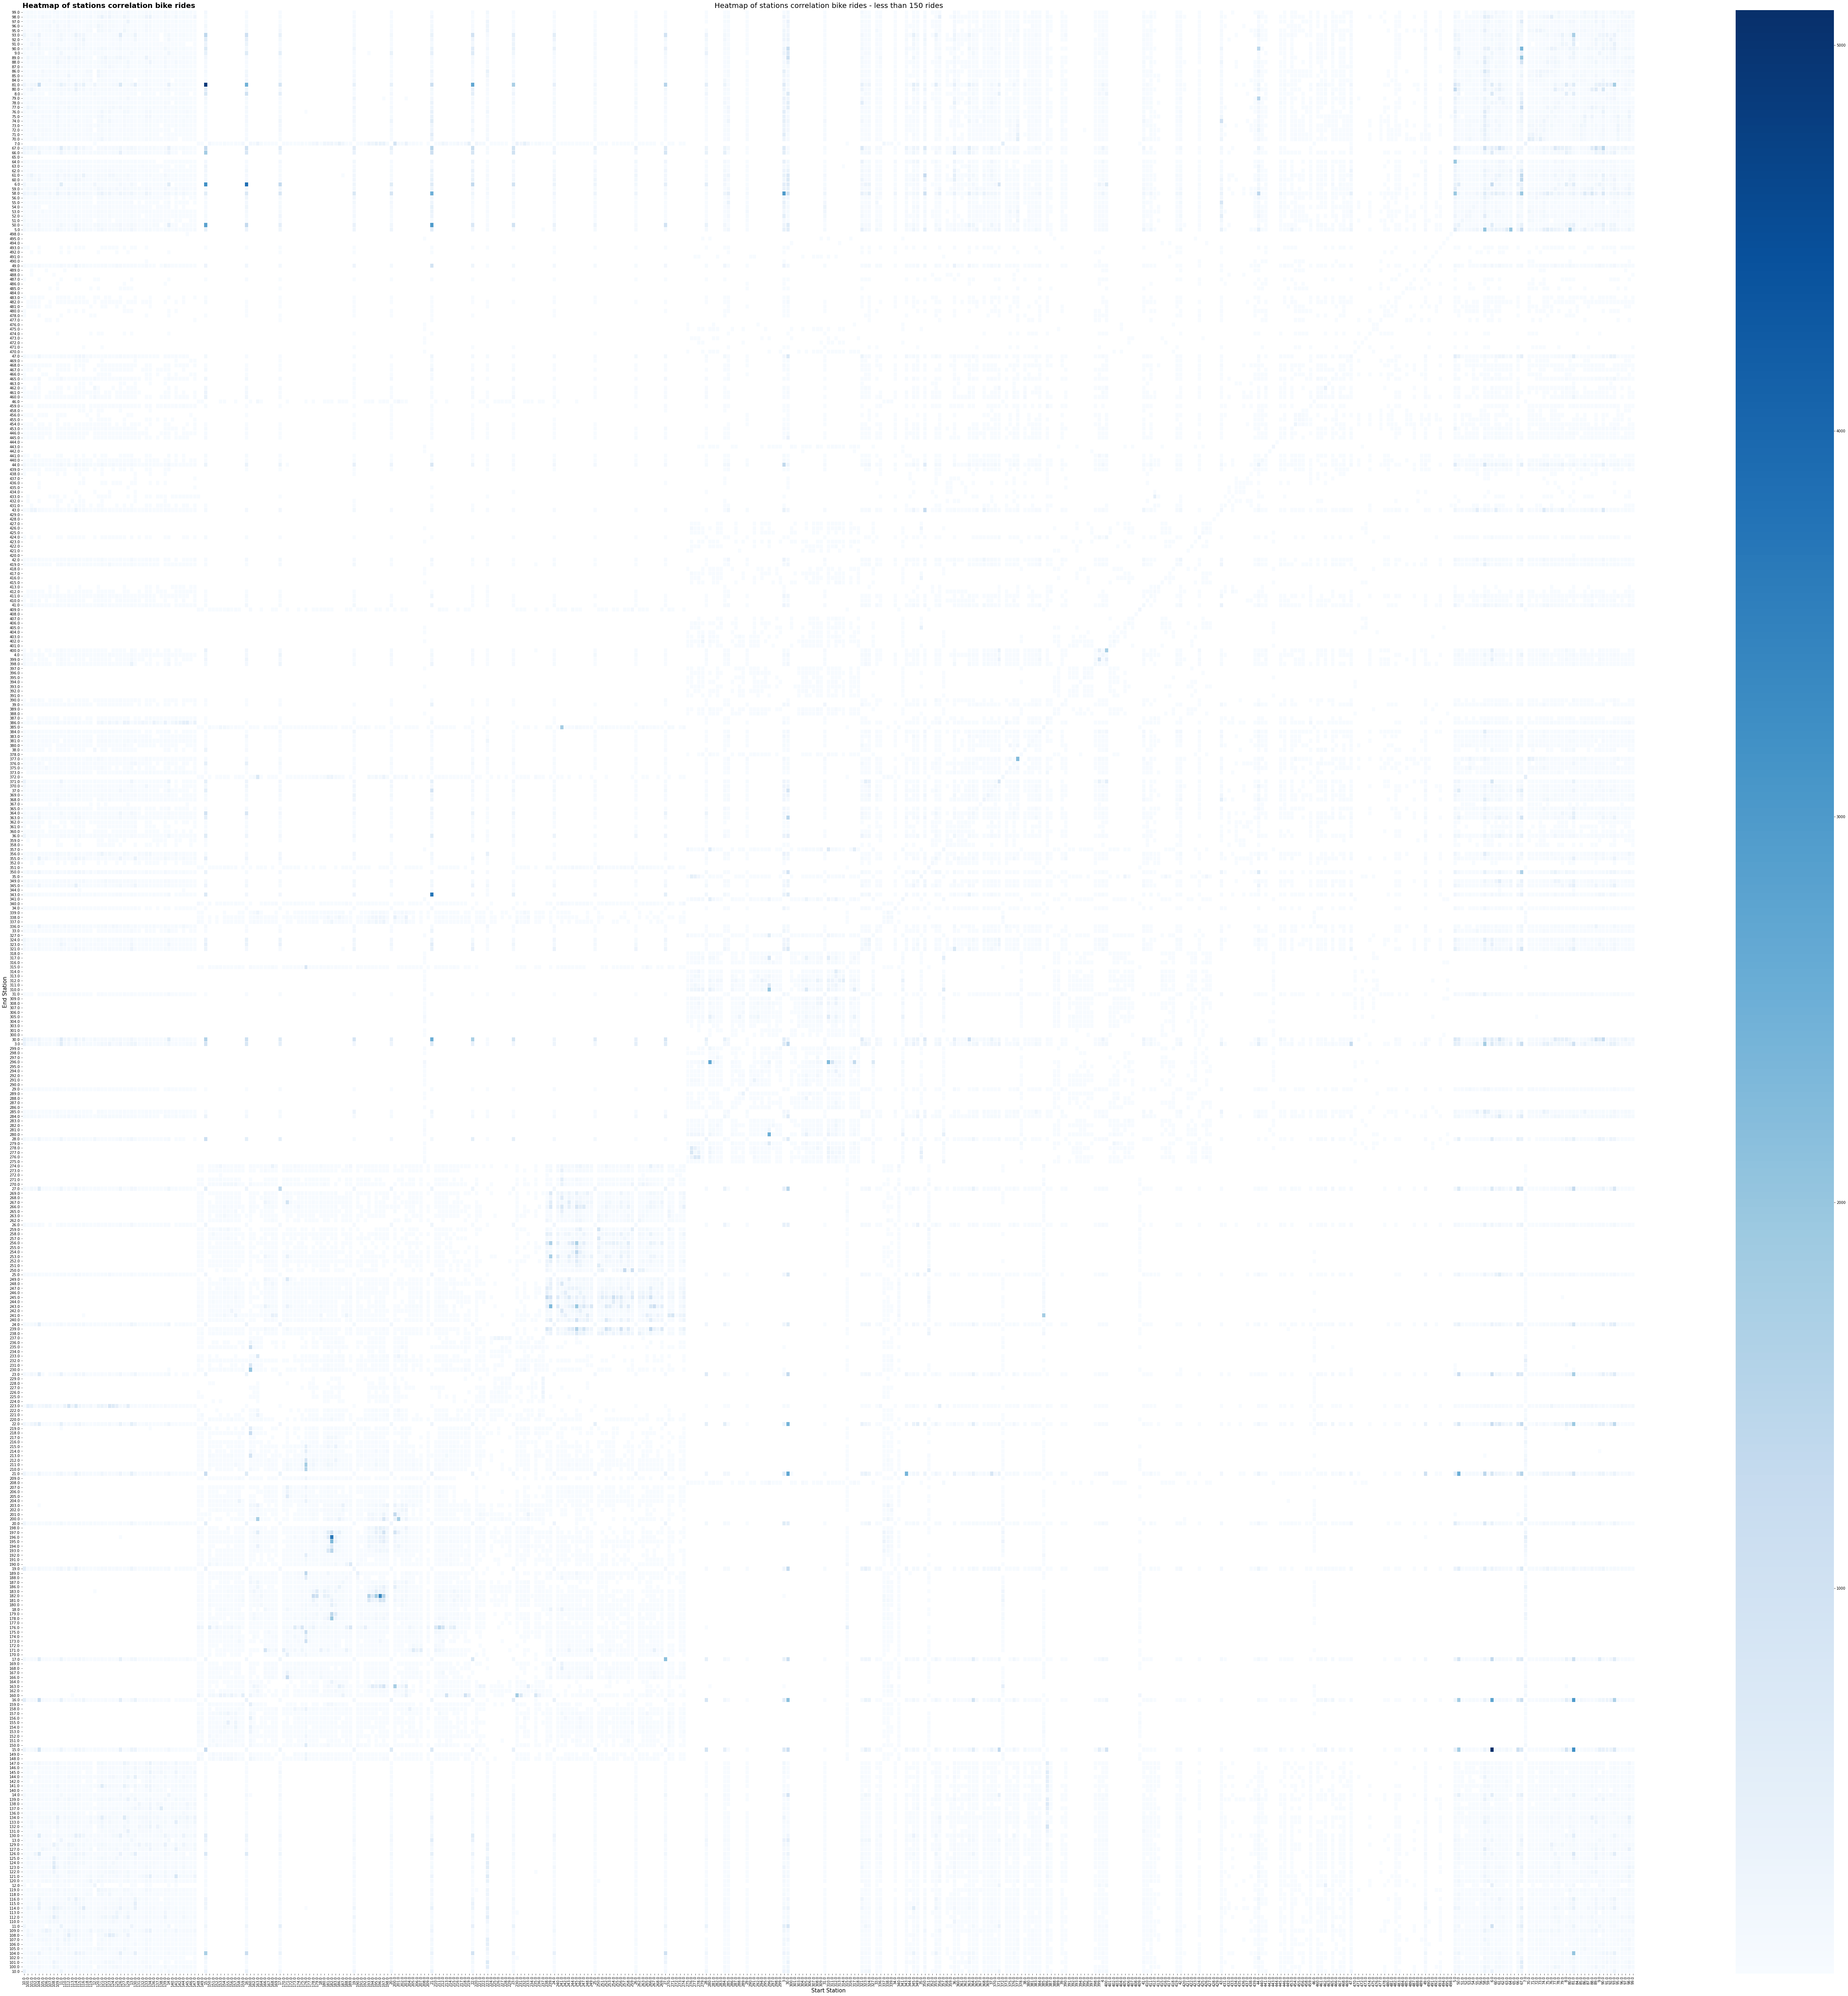

In [51]:
# from above the max is too high (5091) compared to std (136). Let's split: below 150 and above 150
f, ax = plt.subplots(figsize=(100, 100))

plt.title('Heatmap of stations correlation bike rides', loc='left', fontsize=20, weight='bold');
sb.heatmap(stations_correlation_heatmap_pivotdata, cmap ='Blues', linewidths = 0.30)
ax.invert_yaxis()
plt.title('Heatmap of stations correlation bike rides - less than 150 rides', fontsize = 20) # title with fontsize 20
plt.xlabel('Start Station', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('End Station', fontsize = 15) # y-axis label with fontsize 15

From above: The 45 degree line, depects the same start and end station.
Other than this. Very difficult to get any useful info.
Even the title, x-title, etc are not clear.

In [52]:
# Limit the dataset `df_subset` to :
# Subscribers only
# 1 Month: Mars
# from 7-9 am
# heavy load stations

In [53]:
df_subset = df_bike_trips.copy()

In [54]:
df_subset = df_bike_trips[(df_bike_trips.month == 2) & (df_bike_trips.user_type == 'Subscriber') & (df_bike_trips.hour_of_day >= 7) & (df_bike_trips.hour_of_day <= 9)] 

In [55]:
df_subset.start_station_name.value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    1638
San Francisco Caltrain (Townsend St at 4th St)               1090
Berry St at 4th St                                            935
Market St at 10th St                                          896
Howard St at Beale St                                         895
                                                             ... 
9th St at San Fernando St                                       2
Mission St at 1st St                                            2
Parker Ave at McAllister St                                     1
Empire St at 7th St                                             1
Almaden Blvd at San Fernando St                                 1
Name: start_station_name, Length: 320, dtype: int64

In [56]:
df_subset.end_station_name.value_counts()

Montgomery St BART Station (Market St at 2nd St)             1372
Berry St at 4th St                                           1236
San Francisco Caltrain Station 2  (Townsend St at 4th St)    1142
Market St at 10th St                                          956
Howard St at Beale St                                         862
                                                             ... 
14th St at Filbert St                                           1
Bestor Art Park                                                 1
Empire St at 7th St                                             1
Pierce Ave at Market St                                         1
Palm St at Willow St                                            1
Name: end_station_name, Length: 319, dtype: int64

##### '''We can easily see the 4 most used stations: 
* San Francisco Caltrain Station 2  (Townsend St at 4th St)
* San Francisco Caltrain (Townsend St at 4th St)
* Montgomery St BART Station (Market St at 2nd St)
* Berry St at 4th St

In [57]:
# Limit the dataset again to those stations: And let's examine the traffic betwen those stations
station_list = ['San Francisco Caltrain Station 2 (Townsend St at 4th St)', 'San Francisco Caltrain (Townsend St at 4th St)','Montgomery St BART Station (Market St at 2nd St)','Montgomery St BART Station (Market St at 2nd St)']
df_subset = df_subset[(df_subset['start_station_name'].isin(station_list)) & (df_subset['end_station_name'].isin(station_list))]
print(df_bike_trips.shape)
print(df_subset.shape)

(2407259, 21)
(95, 21)


In [58]:
df_subset

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,...,user_type,bike_share_for_all_trip,rental_access_method,day_of_the_year,hour_of_day,day_of_week,working_day,month,duration_min,ground_distance
199396,2019-02-28 09:09:54.388,2019-02-28 09:19:07.947,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,...,Subscriber,No,NaN,59,9,3,True,2,9.216667,1.527901
201296,2019-02-28 07:37:26.366,2019-02-28 07:44:35.446,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,...,Subscriber,No,NaN,59,7,3,True,2,7.150000,1.527901
201545,2019-02-28 07:07:43.682,2019-02-28 07:14:32.720,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,...,Subscriber,No,NaN,59,7,3,True,2,6.816667,1.527901
207490,2019-02-27 09:22:33.317,2019-02-27 09:37:06.305,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,...,Subscriber,No,NaN,58,9,2,True,2,14.533333,1.527901
207634,2019-02-27 09:17:09.221,2019-02-27 09:26:54.927,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,...,Subscriber,No,NaN,58,9,2,True,2,9.750000,1.527901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369212,2019-02-02 07:53:07.050,2019-02-02 07:59:30.773,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,...,Subscriber,No,NaN,33,7,5,False,2,6.383333,1.527901
373853,2019-02-01 08:55:14.824,2019-02-01 09:01:47.343,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,...,Subscriber,No,NaN,32,8,4,True,2,6.533333,1.527901
374430,2019-02-01 08:16:06.274,2019-02-01 08:29:44.601,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,...,Subscriber,No,NaN,32,8,4,True,2,13.633333,1.527901
374719,2019-02-01 07:53:48.132,2019-02-01 08:09:24.823,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,...,Subscriber,No,NaN,32,7,4,True,2,15.600000,1.527901


In [59]:
# Let's do the correlation
stations_correlation = df_subset.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='count')
stations_correlation_heatmap_pivotdata = stations_correlation.pivot(index='start_station_name', columns='end_station_name', values='count')
'''Let's see the values first'''
stations_correlation.describe()

,count
count,4.000000
mean,23.750000
std,36.944779
min,2.000000
25%,4.250000
50%,7.000000
75%,26.500000
max,79.000000


Text(339.0, 0.5, 'End Station')

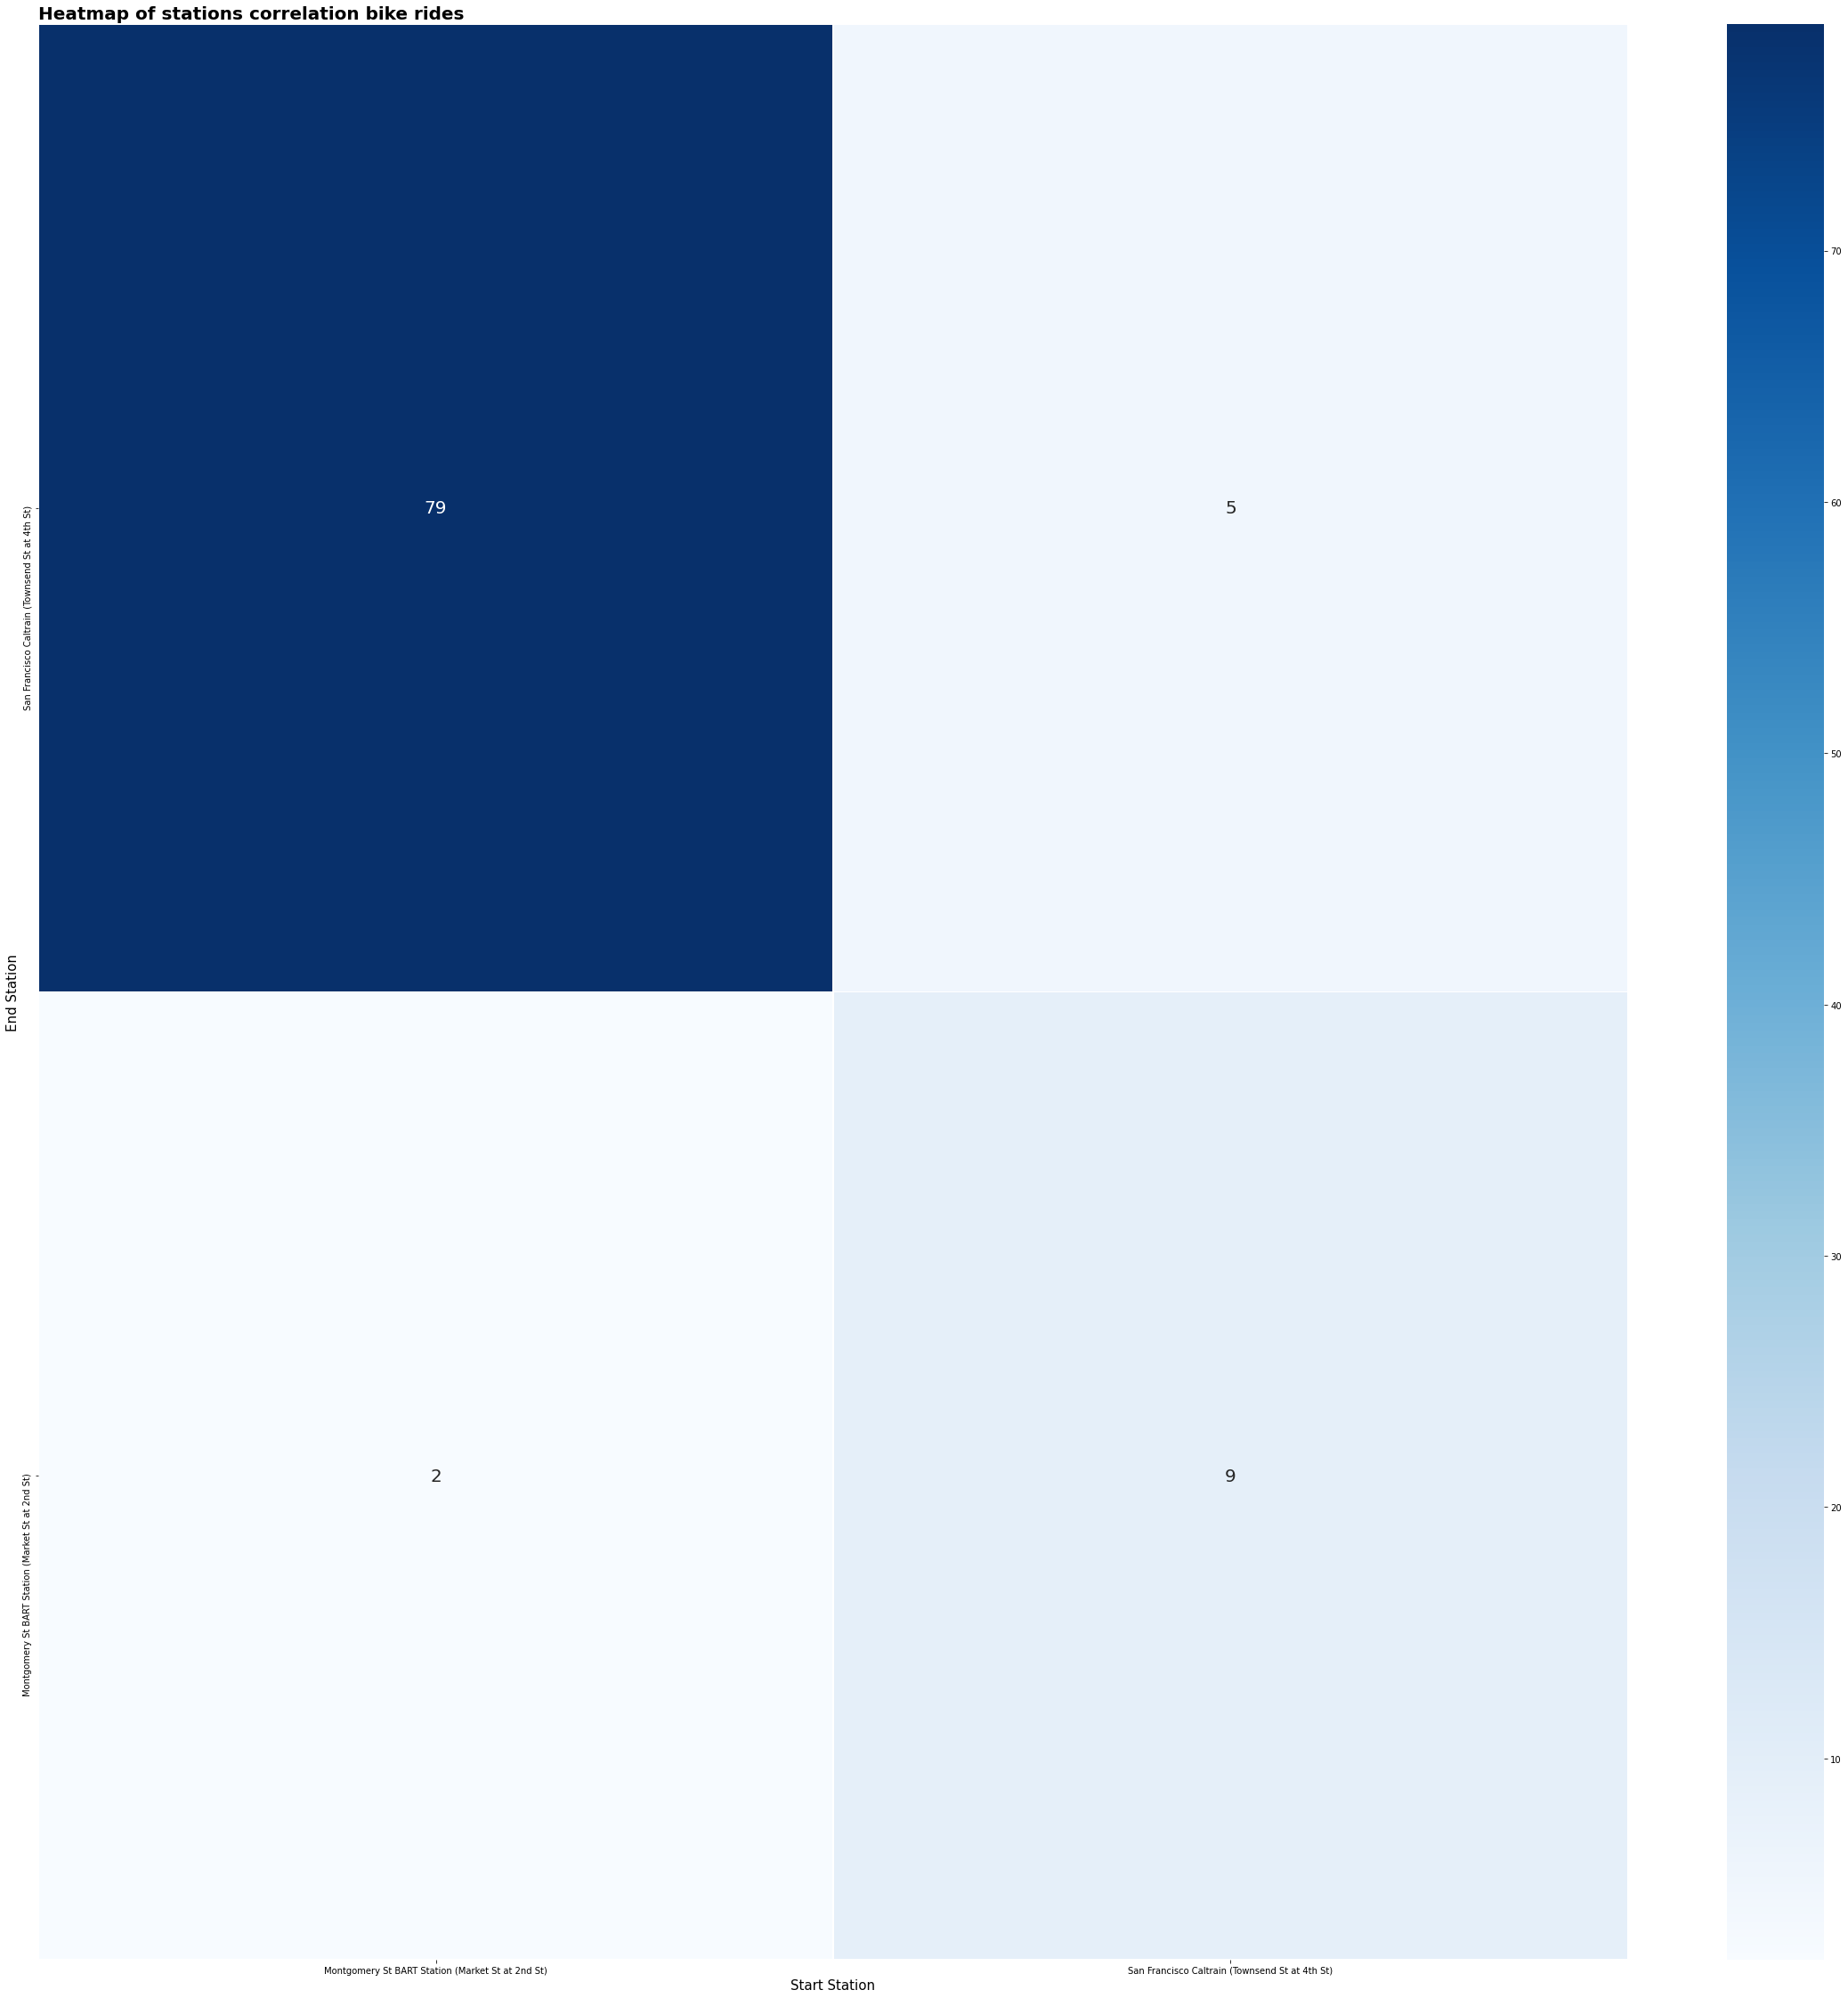

In [60]:
f, ax = plt.subplots(figsize=(40, 40))

plt.title('Heatmap of stations correlation bike rides', loc='left', fontsize=20, weight='bold');
sb.heatmap(stations_correlation_heatmap_pivotdata, cmap ='Blues', linewidths = 0.10, annot=True, annot_kws={"fontsize":20})
ax.invert_yaxis()
plt.xlabel('Start Station', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('End Station', fontsize = 15) # y-axis label with fontsize 15

#### Conculsion: There are many riders from:'Montgomery St BART Station (Market St at 2nd St)' station to 'San Francisco Caltrain (Townsend St at 4th St)'. Much more than the opposit 
This means: We need to have more bikes in the morning at: `Montgomery St BART Station (Market St at 2nd St)` and to transport bikes bake to this station from: `San Francisco Caltrain (Townsend St at 4th St)` from 7-9 am everyday

More simialr analysis is needed
Propose: Having 2 new fields for each ride: The UTM of every station, then having a heatmap of UTM axis (map) and the number of rides starting from eah station

Text(0, 0.5, 'Trip Duration in Minute')

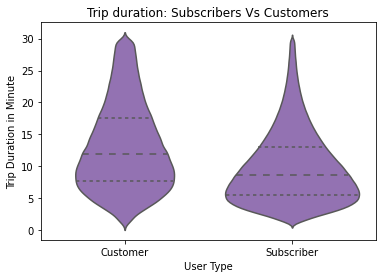

In [61]:
#### Another look for the trip duration.  
baseColor = sb.color_palette()[4]
sb.violinplot(data=df_bike_trips[df_bike_trips.duration_min<30], x='user_type', y='duration_min', color=baseColor, inner='quartile')
plt.title('Trip duration: Subscribers Vs Customers')
plt.xlabel('User Type')
plt.ylabel('Trip Duration in Minute')

In [62]:
'''Usually Subscribers have a shorter duration than Customers. Also, they are mainly focussed (lower std): 5-13 minutes '''

'Usually Subscribers have a shorter duration than Customers. Also, they are mainly focussed (lower std): 5-13 minutes '

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Text(0, 0.5, 'Duration (min)')

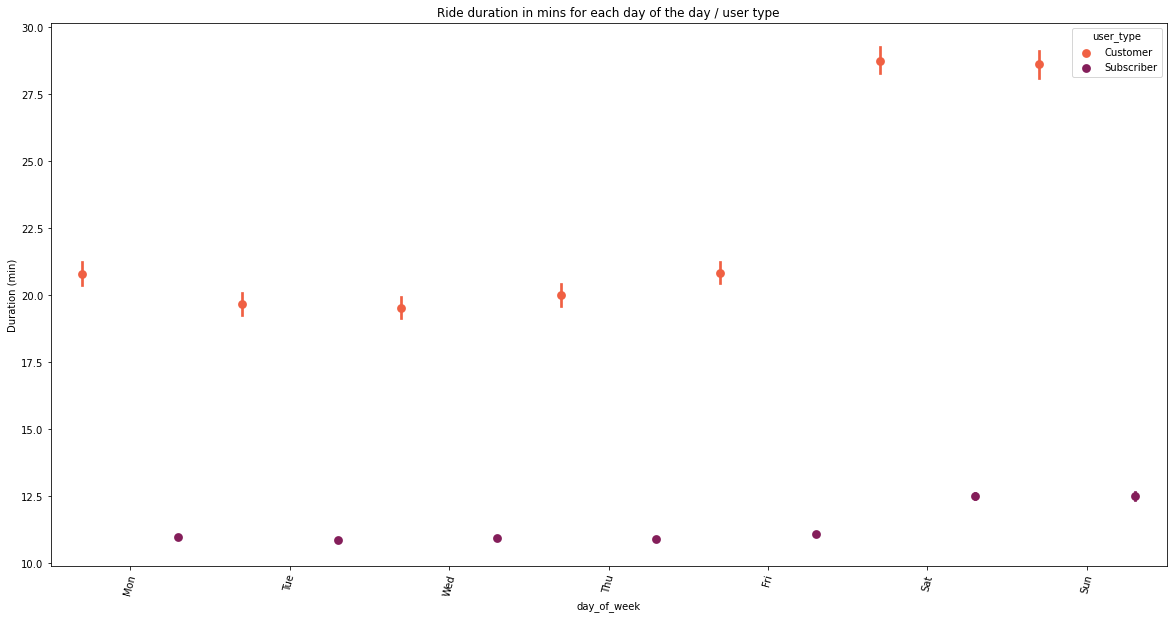

In [63]:
fig = plt.figure(figsize = [20, 10])

ax = sb.pointplot(data=df_bike_trips,
                  x = 'day_of_week',
                  y = 'duration_min',
                  hue = 'user_type',
                  palette = 'rocket_r',
                  linestyles = '',
                  dodge = 0.6)

ax.set_xticklabels(week_day, rotation=75)
plt.title('Ride duration in mins for each day of the day / user type')
plt.ylabel('Duration (min)')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> For subscribers the duration is almost constant throughout the week. For Customer there is an increase in duration with slightly higher variance during weekend

### Were there any interesting or surprising interactions between features?

> Different behavior over the weekend for a certain type of user. We may want to investigate more to support our operation and provide the bikes when and where they are needed. 

Text(0, 0.5, 'Duration (min)')

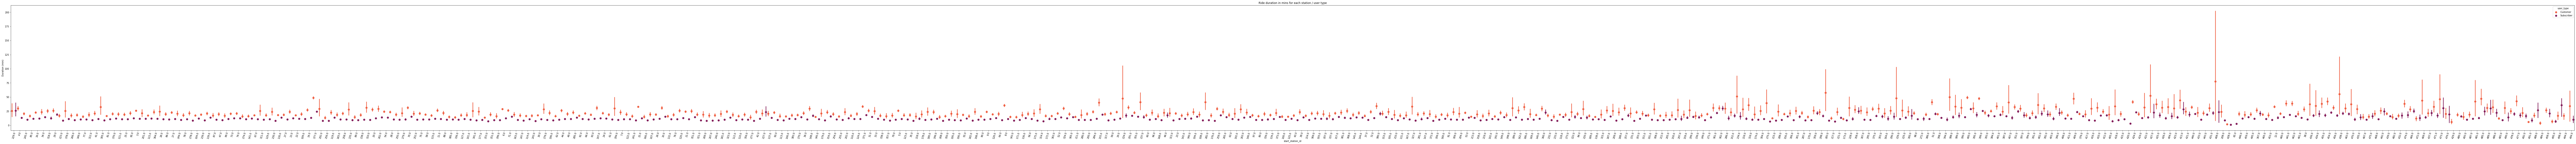

In [64]:
fig = plt.figure(figsize = [200, 10])

ax = sb.pointplot(data=df_bike_trips,
                  x = 'start_station_id',
                  y = 'duration_min',
                  hue = 'user_type',
                  palette = 'rocket_r',
                  linestyles = '',
                  dodge = 0.6)
ax.tick_params(axis='x', rotation=75)
plt.title('Ride duration in mins for each station / user type')
plt.ylabel('Duration (min)')

#start_station_id

#### A futher look indicated that station: 408 has a very high variance for Customers. 

In [65]:
df_bike_trips[df_bike_trips.start_station_id == '408.0'].start_station_name.unique()

array(['MTL-ECO5-01'], dtype=object)

In [66]:
'''The ride stating from the staion: 'MTL-ECO5-01' has a very unpredictable duration. This requies more bikes to be available ther3e '''

"The ride stating from the staion: 'MTL-ECO5-01' has a very unpredictable duration. This requies more bikes to be available ther3e "

## Conclusions
> There are two main perspective of interst: Business Perspective and Operation Perspective.

> Business Perspective: Our main users are the Subscribers. They are mainly using it to go and come back to work. We can either promote more those kind of users or if we reach a good percentage of those users is to start focussing on the Customers

> Operation Perspective: We need to provide the best possible service and have the bikes available when and where needed. For this we can see that we need to send more bikes to the following station `Montgomery St BART Station (Market St at 2nd St)` in the morning during weekdays. I.e.: To take the bikes from other stations, in particular: `San Francisco Caltrain (Townsend St at 4th St)` to send it back to the above sataion.